# TVA

In [69]:
import warnings

warnings.filterwarnings("ignore")

from src import utils
from src.outcomes import plurality_outcome
from src.outcomes import borda_outcome
from src.happiness_level import HappinessLevel
from src.strategic_voting_risk import StrategicVoting
from src.Coalition_Compromising import find_stable_coalitions_by_compromising
import os
import numpy as np 
import pandas as pd

In [70]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"

This is the voting input

In [71]:
voting = utils.read_voting(path_voting, table_name="voting5")
voting_table = voting.to_pandas()
voting_table

,voter_0,voter_1,voter_2,voter_3,voter_4,voter_5
preference_0,C,B,C,C,B,A
preference_1,A,D,D,D,A,D
preference_2,D,C,A,B,D,B
preference_3,B,A,B,A,C,C


(20, 30)
None


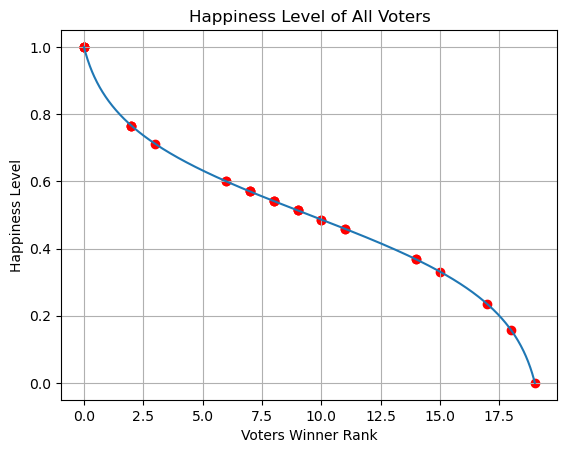

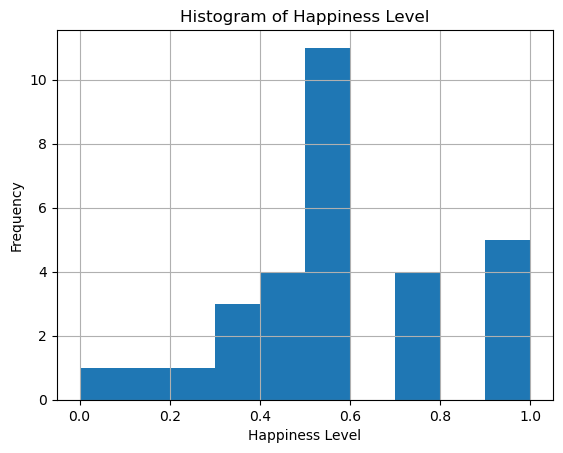

In [72]:
n_cand =20
random_voting = utils.random_voting(30, n_cand)
print(random_voting.shape)
result_random = plurality_outcome(random_voting)
hlevel = HappinessLevel(random_voting, result_random.winner)
print(hlevel._all_happiness_level)
hlevel.plot()
hlevel.histogram()

## Strategic Voting

In [73]:
voting.to_pandas()

,voter_0,voter_1,voter_2,voter_3,voter_4,voter_5
preference_0,C,B,C,C,B,A
preference_1,A,D,D,D,A,D
preference_2,D,C,A,B,D,B
preference_3,B,A,B,A,C,C


In [74]:
result = plurality_outcome(voting)
result

Winner: C
{'A': 1, 'B': 2, 'C': 3, 'D': 0}

Note that **voter 5** is the only voter that can engage in strategic voting. Voter 5 prefers $B$ over the winner $C$. Hence, they can increase their $\text{Happiness Level}$ by placing $B$ as their first preference, resulting in a tie between $C$ and $B$ in the voting outcome (for plurality, voting for two, Borda). Since ties are resolved in alphabetical order, $B$ wins over $C$.

The table below displays the two voting strategies available to voter 5.

In [75]:
happiness_level = HappinessLevel(voting, result.winner)
strategic_voting = StrategicVoting(voting).run(happiness_level, plurality_outcome)

strategic_voting.all

,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,5,"[B, A, D, C]",B,0.410487,0.0,2.820973,3.410487
1,5,"[B, D, A, C]",B,0.410487,0.0,2.820973,3.410487


The table displays the best strategic voting for each voter

In [76]:
strategic_voting.best

,voter,strategic_voting,new_result,strategic_H,previous_H,strategic_overall_H,previous_overall_H
0,5,"[B, A, D, C]",B,0.410487,0.0,2.820973,3.410487


Strategic Voting Risk

In [77]:
strategic_voting.risk

0.13682886358890622

# ADVANCED TVA Using Clustering + Compromising
The idea is to use Clustering plus Compromising. We try to find the stable coalitions that garantee an increase of happiness for all their partecipants

In [80]:
borda_result = _outcome(random_voting)
voting_df_2= pd.DataFrame(random_voting).T
hlevel = HappinessLevel(random_voting, borda_result.winner)
valori = np.array(list(hlevel.happiness_level_dict.values()))
coals = find_stable_coalitions_by_compromising(10, voting_df_2, valori, result_random)

Pushing H made everyone in the group 0 happier, here the new winner:   Winner: H
{'A': 0, 'B': 0, 'C': 5, 'D': 2, 'E': 1, 'F': 1, 'G': 0, 'H': 6, 'I': 1, 'J': 1, 'K': 1, 'L': 1, 'M': 2, 'N': 1, 'O': 1, 'P': 1, 'Q': 3, 'R': 2, 'S': 0, 'T': 1}
is it stable?
True
Pushing A made everyone in the group 3 happier, here the new winner:   Winner: A
{'A': 6, 'B': 0, 'C': 5, 'D': 2, 'E': 1, 'F': 1, 'G': 0, 'H': 2, 'I': 1, 'J': 1, 'K': 1, 'L': 0, 'M': 2, 'N': 1, 'O': 1, 'P': 1, 'Q': 3, 'R': 0, 'S': 1, 'T': 1}
is it stable?
False
Pushing B made everyone in the group 3 happier, here the new winner:   Winner: B
{'A': 0, 'B': 6, 'C': 5, 'D': 2, 'E': 1, 'F': 1, 'G': 0, 'H': 2, 'I': 1, 'J': 1, 'K': 1, 'L': 0, 'M': 2, 'N': 1, 'O': 1, 'P': 1, 'Q': 3, 'R': 0, 'S': 1, 'T': 1}
is it stable?
True


In [66]:
print(coals)

[(True,     0  1  2  3  4  5  6  7  8  9  ... 14 15 16 17 18 19         H gruppo  \
0   R  H  Q  O  K  T  D  L  A  S  ...  B  P  M  F  C  G  0.288376      0   
5   P  D  T  O  B  I  G  L  N  R  ...  E  K  S  M  H  F  0.234424      0   
12  Q  L  T  O  M  G  C  K  D  R  ...  E  I  P  B  A  F  0.668792      0   
13  T  I  A  Q  C  D  J  L  H  S  ...  E  B  R  N  F  M  0.000000      0   
17  E  J  D  Q  A  G  P  T  C  L  ...  N  O  R  M  I  H  0.234424      0   

                                         manipulation     New_H  
0   [Q, R, H, O, K, T, D, L, A, S, J, N, E, I, B, ...  0.765576  
5   [Q, P, D, T, O, B, I, G, L, N, R, C, A, J, E, ...  0.400249  
12  [Q, L, T, O, M, G, C, K, D, R, N, H, S, J, E, ...  1.000000  
13  [Q, T, I, A, C, D, J, L, H, S, G, O, K, P, E, ...  0.711624  
17  [Q, E, J, D, A, G, P, T, C, L, B, F, K, S, N, ...  0.711624  

[5 rows x 24 columns], Winner: Q
{'A': 2, 'B': 1, 'C': 2, 'D': 0, 'E': 1, 'F': 1, 'G': 1, 'H': 1, 'I': 1, 'J': 1, 'K': 1, 'L': 2, 'M': 3, 

In [47]:
'''
def stability_of_coalitions(coal, voting_df, results, voting):

    combinations_list = []
    stable = True
    r = 2
    max_r = len(coal.index)
    subcoalitions = []
    while r < max_r:
        combinations_list.extend(
            list(combinations(coal.index, r))
        )  # you check in the coalition, because they are theoretically the most similar.
        for el in combinations_list:
            indice = pd.Index(el)
            new_poss_coal = coal.loc[indice]
            better_op = []

            for index, row in new_poss_coal.iterrows():
                pref = list(row.iloc[0:-4])
                ind = pref.index(results.winner)
                candidates = set(
                    remove_elements_above_or_equal_index(pref, ind)
                )  # find the candidates above the winner
                better_op.append(candidates)

            if len(better_op) > 1:  # if the coalition is bigg than 1
                intersection = better_op[1].copy()
                for el in better_op:
                    intersection = set.intersection(el, intersection)

                if len(intersection) > 0:

                    for alt in intersection:  # try the alternatives in the intersection

                        man = []  # initialize the list with the voters manipulations

                        for index, row in new_poss_coal.iterrows():
                            pref = list(row.iloc[0:-4])
                            ind = pref.index(alt)
                            pref.pop(ind)
                            pref.insert(0, alt)
                            man.append(pref)

                        coal_new_h, new_result = find_new_happiness2(
                            man, new_poss_coal.iloc[:, :-1], voting_df, voting
                        )  # compute the new happiness

                        if analyze_core(coal_new_h, "H", "New_H_subcoal") == True:

                            is_stable = pd.concat(
                                [coal_new_h, new_poss_coal["New_H"]], axis=1
                            )

                            if (
                                analyze_core(is_stable, "New_H", "New_H_subcoal")
                                == True
                            ):
                                stable = False
                                subcoalitions.append(is_stable)

        combinations_list = []
        r += 1
    if len(subcoalitions) > 0:
        return stable, subcoalitions
    else:

        return stable, coal'''

'\ndef stability_of_coalitions(coal, voting_df, results, voting):\n\n    combinations_list = []\n    stable = True\n    r = 2\n    max_r = len(coal.index)\n    subcoalitions = []\n    while r < max_r:\n        combinations_list.extend(\n            list(combinations(coal.index, r))\n        )  # you check in the coalition, because they are theoretically the most similar.\n        for el in combinations_list:\n            indice = pd.Index(el)\n            new_poss_coal = coal.loc[indice]\n            better_op = []\n\n            for index, row in new_poss_coal.iterrows():\n                pref = list(row.iloc[0:-4])\n                ind = pref.index(results.winner)\n                candidates = set(\n                    remove_elements_above_or_equal_index(pref, ind)\n                )  # find the candidates above the winner\n                better_op.append(candidates)\n\n            if len(better_op) > 1:  # if the coalition is bigg than 1\n                intersection = better_op[1

In [48]:
'''
from scipy.stats import spearmanr
from sklearn.cluster import AgglomerativeClustering
from src import utils
from src.outcomes import plurality_outcome
from src.happiness_level import HappinessLevel
import numpy as np 
import pandas as pd
import hashlib
from itertools import combinations


def get_df_hash(df): 
    df_bytes = df.to_json().encode()
    return hashlib.md5(df_bytes).hexdigest()

def remove_elements_above_or_equal_index(lst, index): 
    if index < 0 or index >= len(lst):
        return lst  
    
    return lst[:index]  


def find_new_happiness(manipulations, coalition, voting_df): #Function that for a manipulation of a coalition gives you the new happiness values
    n_cand = len(voting_df.columns)-1
    coalition['manipulation']=manipulations
    indici = coalition.index
    df = pd.DataFrame(manipulations, index= indici, columns=[i for i in range(0, n_cand)])
    new_voting_df = voting_df.copy()
    new_voting_df.loc[indici] = df
    new_results = plurality_outcome(new_voting_df.iloc[:, :n_cand].values.T)
    diz = HappinessLevel(voting_df.iloc[:, :n_cand].values.T, new_results.winner).happiness_level_dict 
    New_Happiness_Levels = pd.DataFrame.from_dict(diz, orient='index', columns=['New_H']) #compute the happiness of the new results with respect of the real preferences
    coalition = pd.merge(coalition, New_Happiness_Levels,left_index=True, right_index=True)

    
    return coalition, new_results

def find_new_happiness2(manipulations, coalition, voting_df): #Function that for a manipulation of a coalition gives you the new happiness values
    n_cand = len(voting_df.columns)-1
    coalition['manipulation']=manipulations
    indici = coalition.index
    df = pd.DataFrame(manipulations, index= indici, columns=[i for i in range(0, n_cand)])
    new_voting_df = voting_df.copy()
    new_voting_df.loc[indici] = df
    new_results = plurality_outcome(new_voting_df.iloc[:, :n_cand].values.T)
    diz = HappinessLevel(voting_df.iloc[:, :n_cand].values.T, new_results.winner).happiness_level_dict 
    New_Happiness_Levels = pd.DataFrame.from_dict(diz, orient='index', columns=['New_H_subcoal']) #compute the happiness of the new results with respect of the real preferences
    coalition = pd.merge(coalition, New_Happiness_Levels,left_index=True, right_index=True)

    
    return coalition, new_results
def analyze_core(coalition, var1, var2): #Analize if inside or not the code
    

    real_happ = coalition[var1]
    fake_happ = coalition[var2]
    
    comparison_result = [fake > real for real, fake in zip(real_happ, fake_happ)]
    
    if all(comparison_result):
        return True
    else:
        return False


def stability_of_coalitions(coal, voting_df, results, scoal_index):
    
    combinations_list = []
    stable=True
    r=2
    max_r = len(coal.index)
    subcoalitions=[]
    while r<max_r:
        combinations_list.extend(list(combinations(coal.index, r)))
        for el in combinations_list:
            indice = pd.Index(el)
            new_poss_coal = coal.loc[indice]
            better_op=[]
            if get_df_hash(new_poss_coal.drop(columns=['H', 'New_H', 'gruppo'])) not in scoal_index:
                scoal_index[get_df_hash(new_poss_coal.drop(columns=['gruppo', 'New_H', 'H']))]=new_poss_coal

                for index, row in new_poss_coal.iterrows():
                    pref = list(row.iloc[0:-4])
                    ind = pref.index(results.winner) 
                    candidates = set(remove_elements_above_or_equal_index(pref, ind)) #find the candidates above the winner
                    better_op.append(candidates) 
            
                if len(better_op)>1: #if the coalition is bigg than 1
                    intersection = better_op[1].copy()
                    for el in better_op:
                        intersection = set.intersection(el, intersection)

                    if len(intersection)>0:

                        for alt in intersection: #try the alternatives in the intersection

                            man=[] #initialize the list with the voters manipulations 

                            for index, row in new_poss_coal.iterrows():
                                pref = list(row.iloc[0:-4])
                                ind = pref.index(alt)
                                pref.pop(ind)
                                pref.insert(0, alt)
                                man.append(pref) 
                            
                            coal_new_h, new_result = find_new_happiness2(man, new_poss_coal.iloc[:, :-1], voting_df) #compute the new happiness
                            
                            
                            if analyze_core(coal_new_h, 'H', 'New_H_subcoal') == True:
                                
                                
                                is_stable = pd.concat([coal_new_h, new_poss_coal['New_H']], axis=1)
                                
                                if analyze_core(is_stable, 'New_H', 'New_H_subcoal')==True:
                                    stable=False
                                    subcoalitions.append(is_stable)
                                   
            else:

                print('ciaooo')
                coal_new_h = scoal_index[get_df_hash(new_poss_coal.drop(columns=['H', 'New_H', 'gruppo']))]

                if analyze_core(coal_new_h, 'H', 'New_H_subcoal') == True:

                    is_stable = pd.concat([coal_new_h, new_poss_coal['New_H']], axis=1)
                    
                    if analyze_core(is_stable, 'New_H', 'New_H_subcoal')==True:
                        stable=False
                        subcoalitions.append(is_stable)

                        
        combinations_list=[]
        r+=1

    if len(subcoalitions)>0:
        return stable, subcoalitions
    else:

        return stable, [coal]
'''

"\nfrom scipy.stats import spearmanr\nfrom sklearn.cluster import AgglomerativeClustering\nfrom src import utils\nfrom src.outcomes import plurality_outcome\nfrom src.happiness_level import HappinessLevel\nimport numpy as np \nimport pandas as pd\nimport hashlib\nfrom itertools import combinations\n\n\ndef get_df_hash(df): \n    df_bytes = df.to_json().encode()\n    return hashlib.md5(df_bytes).hexdigest()\n\ndef remove_elements_above_or_equal_index(lst, index): \n    if index < 0 or index >= len(lst):\n        return lst  \n    \n    return lst[:index]  \n\n\ndef find_new_happiness(manipulations, coalition, voting_df): #Function that for a manipulation of a coalition gives you the new happiness values\n    n_cand = len(voting_df.columns)-1\n    coalition['manipulation']=manipulations\n    indici = coalition.index\n    df = pd.DataFrame(manipulations, index= indici, columns=[i for i in range(0, n_cand)])\n    new_voting_df = voting_df.copy()\n    new_voting_df.loc[indici] = df\n    new

In [49]:
'''
def find_stable_coalitions_by_compromising(max_coal, voting_df, happiness_level, results):
    
    win = results.winner
    voting_df['H']= happiness_level._all_happiness_level
    others = voting_df[voting_df[0]!=win]
    #Creating Dissimilarity Matrix
    rankings = np.array(others.T)
    cor_mat, _ = spearmanr(rankings[:-2])
    dsim_mat = np.around(1 - cor_mat, decimals=4)
    np.fill_diagonal(dsim_mat, 0)

    #find stable coalitions
    coal = []
    coal_index= {}
    scoal_index ={}
    for num in range(max_coal, 1, -1):

        clustering = AgglomerativeClustering(n_clusters=num, affinity='precomputed', linkage='average') #do clustering
        clusters = clustering.fit_predict(dsim_mat)
        others['gruppo'] = clusters

        for coal_id, coalition in others.groupby('gruppo'):
        
        
            
            if get_df_hash(coalition.iloc[:, :-2]) not in coal_index:
                better_op=[]
                coal_index[get_df_hash(coalition.iloc[:, :-2])]=coalition

                for index, row in coalition.iterrows():
                    pref = list(row.iloc[0:-2])
                    ind = pref.index(win) 
                    candidates = set(remove_elements_above_or_equal_index(pref, ind)) #find the candidates above the winner
                    better_op.append(candidates) 
            
                if len(better_op)>1: #if the coalition is bigg than 1
                    intersection = better_op[1].copy()
                    for el in better_op:
                        intersection = set.intersection(el, intersection)

                    if len(intersection)>0:

                        for alt in intersection: #try the alternatives in the intersection

                            man=[] #initialize the list with the voters manipulations 

                            for index, row in coalition.iterrows():
                                pref = list(row.iloc[0:-2])
                                ind = pref.index(alt)
                                pref.pop(ind)
                                pref.insert(0, alt)
                                man.append(pref) 

                            coal_new_h, new_result = find_new_happiness(man, coalition, voting_df) #compute the new happiness

                            coalition = coalition.iloc[:, :-1]

                            if analyze_core(coal_new_h, 'H', 'New_H') == True:

                                #print(f'Pushing {alt} made everyone in the group {coal_id} happier, here the new winner:  ', new_result)
                                print(f'is it stable?')
                                stable, subcoals = stability_of_coalitions(coal_new_h, voting_df, results, scoal_index)
                                print(stable)
                                if stable==True:

                                    coal.append((True, coal_new_h, new_result))
                                else:

                                    coal.append((False, coal_new_h, new_result, subcoals))

                                


    return coal

'''

"\ndef find_stable_coalitions_by_compromising(max_coal, voting_df, happiness_level, results):\n    \n    win = results.winner\n    voting_df['H']= happiness_level._all_happiness_level\n    others = voting_df[voting_df[0]!=win]\n    #Creating Dissimilarity Matrix\n    rankings = np.array(others.T)\n    cor_mat, _ = spearmanr(rankings[:-2])\n    dsim_mat = np.around(1 - cor_mat, decimals=4)\n    np.fill_diagonal(dsim_mat, 0)\n\n    #find stable coalitions\n    coal = []\n    coal_index= {}\n    scoal_index ={}\n    for num in range(max_coal, 1, -1):\n\n        clustering = AgglomerativeClustering(n_clusters=num, affinity='precomputed', linkage='average') #do clustering\n        clusters = clustering.fit_predict(dsim_mat)\n        others['gruppo'] = clusters\n\n        for coal_id, coalition in others.groupby('gruppo'):\n        \n        \n            \n            if get_df_hash(coalition.iloc[:, :-2]) not in coal_index:\n                better_op=[]\n                coal_index[get_df_h